In [1]:
import json 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.cluster import KMeans

<h2>Indonesia</h2>

In [2]:
indonesia = 'Indonesia.json'
idn = pd.read_json(indonesia,convert_dates=True)

In [3]:
idn.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Indonesia,ID,,,,-0.79,113.92,4241,373,359,3509,2020-04-13 00:00:00+00:00
1,Indonesia,ID,,,,-0.79,113.92,4557,399,380,3778,2020-04-14 00:00:00+00:00
2,Indonesia,ID,,,,-0.79,113.92,4839,459,426,3954,2020-04-15 00:00:00+00:00
3,Indonesia,ID,,,,-0.79,113.92,5516,498,548,4470,2020-04-16 00:00:00+00:00
4,Indonesia,ID,,,,-0.79,113.92,5516,496,548,4472,2020-04-17 00:00:00+00:00


In [4]:
idn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      19 non-null     object             
 1   CountryCode  19 non-null     object             
 2   Province     19 non-null     object             
 3   City         19 non-null     object             
 4   CityCode     19 non-null     object             
 5   Lat          19 non-null     float64            
 6   Lon          19 non-null     float64            
 7   Confirmed    19 non-null     int64              
 8   Deaths       19 non-null     int64              
 9   Recovered    19 non-null     int64              
 10  Active       19 non-null     int64              
 11  Date         19 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(5)
memory usage: 1.9+ KB


In [5]:
idn['Date'] = pd.to_datetime(idn['Date']).dt.date
idn.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Indonesia,ID,,,,-0.79,113.92,4241,373,359,3509,2020-04-13
1,Indonesia,ID,,,,-0.79,113.92,4557,399,380,3778,2020-04-14
2,Indonesia,ID,,,,-0.79,113.92,4839,459,426,3954,2020-04-15
3,Indonesia,ID,,,,-0.79,113.92,5516,498,548,4470,2020-04-16
4,Indonesia,ID,,,,-0.79,113.92,5516,496,548,4472,2020-04-17


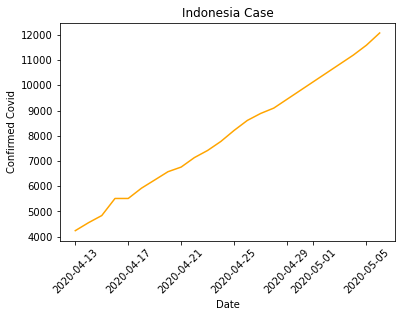

In [6]:
#Plot Indonesia Confirmed Covid19
x= idn['Date']
y= idn['Confirmed']
plt.plot(x, y, color='orange')
plt.title('Indonesia Case')
plt.ylabel('Confirmed Covid')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

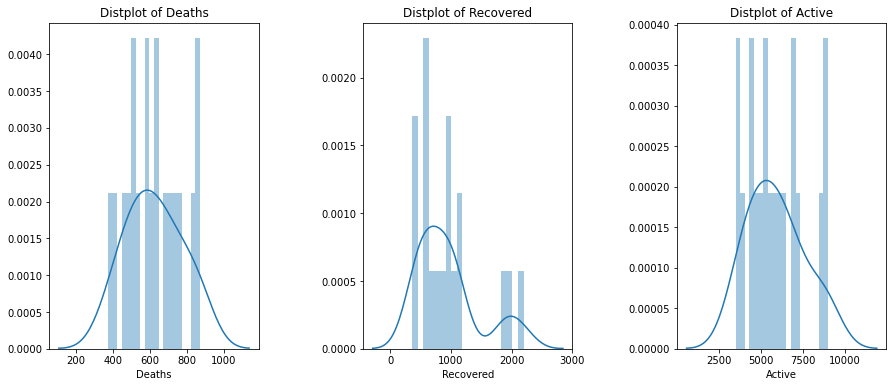

In [7]:
#Histogram Deaths,Recovered and Active Indonesia
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Deaths' , 'Recovered' , 'Active']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(idn[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

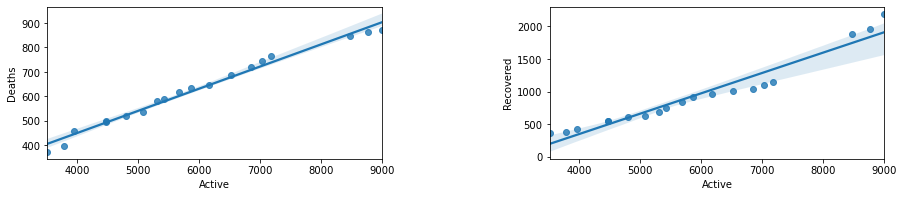

In [8]:
#Relation active between Deaths and Recovered Indonesia
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Active']:
    for y in ['Deaths' , 'Recovered' ]:
        n += 1
        plt.subplot(2 , 2 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = idn)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [9]:
#Clustering using K-means Indonesia
'''Active and Deaths'''
X1 = idn[['Active' , 'Deaths']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

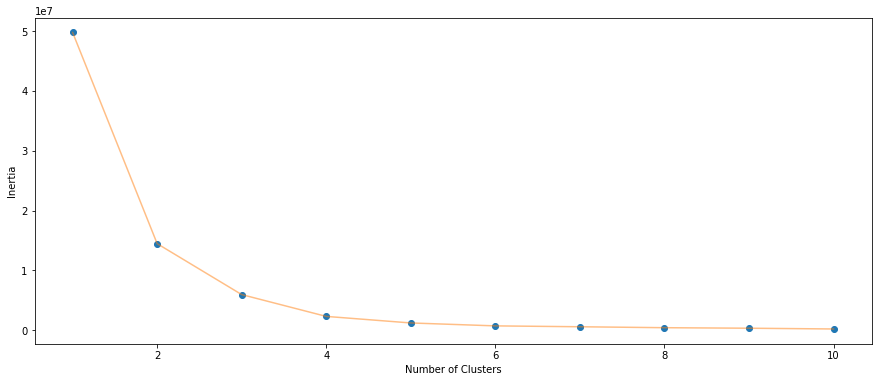

In [10]:
#Select N-cluster based inertia Indonesia
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [11]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

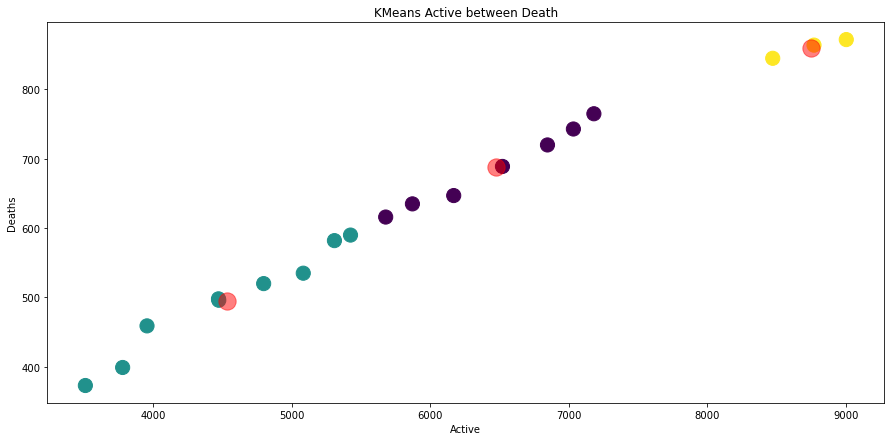

In [12]:
#Ploting KMeans Active between Death Indonesia
plt.figure( figsize = (15 , 7) )
plt.scatter( x = 'Active' ,y = 'Deaths' , data = idn , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Deaths') , plt.xlabel('Active')
plt.title('KMeans Active between Death')
plt.show()

In [13]:
#Clustering using K-means Indonesia
'''Active and Recovered'''
X2 = idn[['Active' , 'Recovered']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

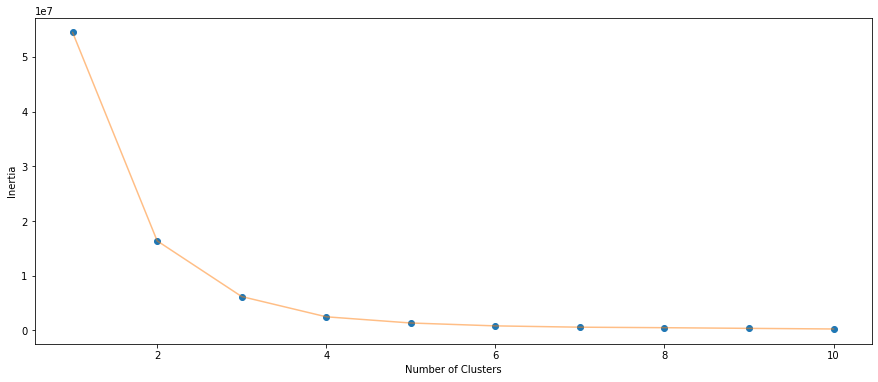

In [14]:
#Select N-cluster based inertia Indonesia
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [15]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

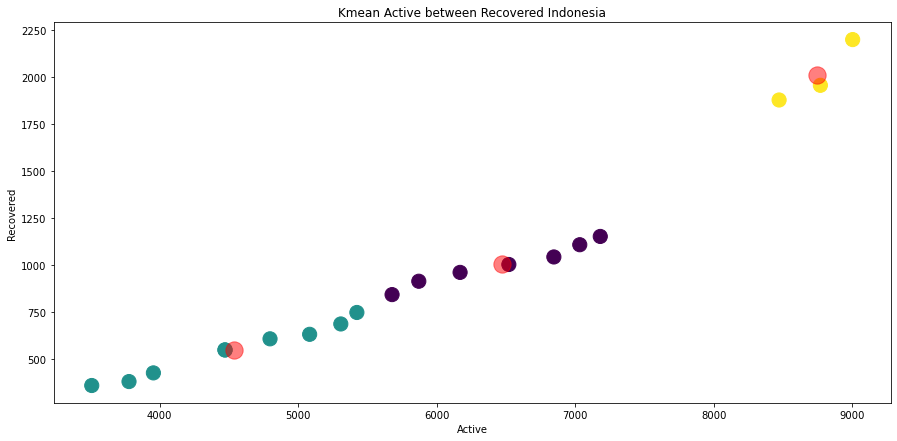

In [16]:
#Ploting Kmean Active between Recovered Indonesia
plt.figure( figsize = (15 , 7) )
plt.scatter( x = 'Active' ,y = 'Recovered' , data = idn , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Recovered') , plt.xlabel('Active')
plt.title('Kmean Active between Recovered Indonesia')
plt.show()

<h2>Malaysia</h2>

In [17]:
malaysia = 'Malaysia.json'
malay = pd.read_json(malaysia,convert_dates=True)

In [18]:
malay.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Malaysia,MY,,,,4.21,101.98,4683,76,2108,2499,2020-04-13 00:00:00+00:00
1,Malaysia,MY,,,,4.21,101.98,4817,77,2276,2464,2020-04-14 00:00:00+00:00
2,Malaysia,MY,,,,4.21,101.98,4987,82,2478,2427,2020-04-15 00:00:00+00:00
3,Malaysia,MY,,,,4.21,101.98,5182,84,2766,2332,2020-04-16 00:00:00+00:00
4,Malaysia,MY,,,,4.21,101.98,5182,84,2766,2332,2020-04-17 00:00:00+00:00


In [19]:
malay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      19 non-null     object             
 1   CountryCode  19 non-null     object             
 2   Province     19 non-null     object             
 3   City         19 non-null     object             
 4   CityCode     19 non-null     object             
 5   Lat          19 non-null     float64            
 6   Lon          19 non-null     float64            
 7   Confirmed    19 non-null     int64              
 8   Deaths       19 non-null     int64              
 9   Recovered    19 non-null     int64              
 10  Active       19 non-null     int64              
 11  Date         19 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(5)
memory usage: 1.9+ KB


In [20]:
malay['Date'] = pd.to_datetime(malay['Date']).dt.date
malay.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Malaysia,MY,,,,4.21,101.98,4683,76,2108,2499,2020-04-13
1,Malaysia,MY,,,,4.21,101.98,4817,77,2276,2464,2020-04-14
2,Malaysia,MY,,,,4.21,101.98,4987,82,2478,2427,2020-04-15
3,Malaysia,MY,,,,4.21,101.98,5182,84,2766,2332,2020-04-16
4,Malaysia,MY,,,,4.21,101.98,5182,84,2766,2332,2020-04-17


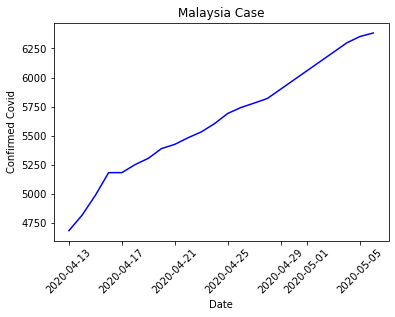

In [21]:
#Plot Malaysia Confirmed Covid19
x= malay['Date']
y= malay['Confirmed']
plt.plot(x, y, color='blue')
plt.title('Malaysia Case')
plt.ylabel('Confirmed Covid')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

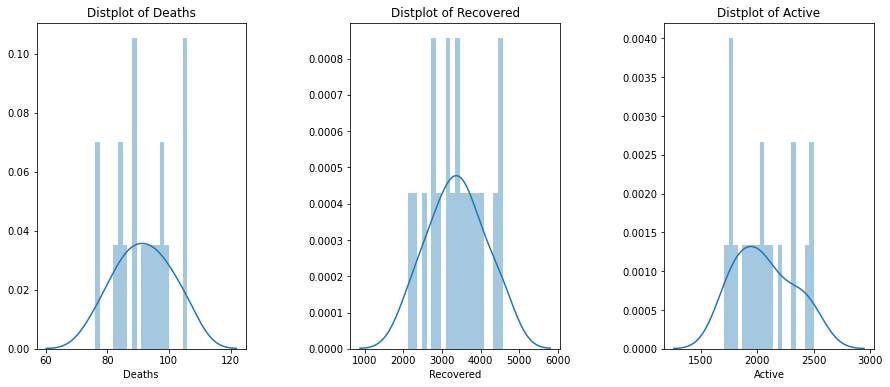

In [22]:
#Histogram Deaths,Recovered and Active Malaysia
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Deaths' , 'Recovered' , 'Active']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(malay[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

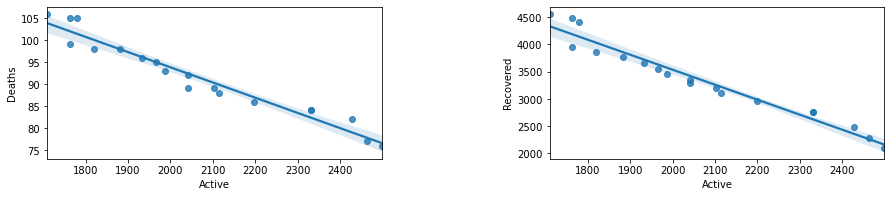

In [23]:
#Relation active between Deaths and Recovered Malaysia
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Active']:
    for y in ['Deaths' , 'Recovered' ]:
        n += 1
        plt.subplot(2 , 2 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = malay)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [24]:
#Clustering using K-means Malaysia
'''Active and Deaths'''
X3 = malay[['Active' , 'Deaths']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

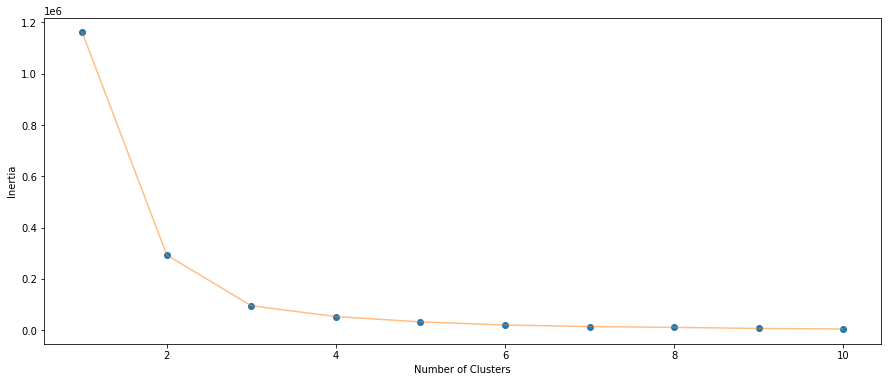

In [25]:
#Select N-cluster based inertia Malaysia
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [26]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

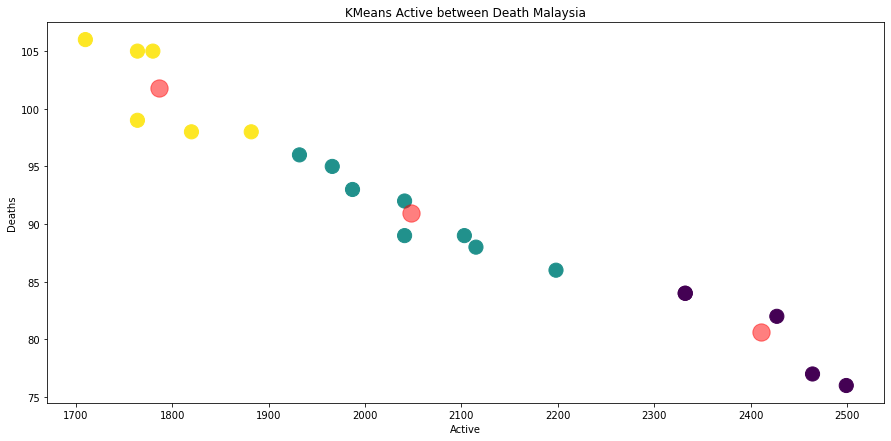

In [27]:
#Ploting KMeans Active between Death Malaysia
plt.figure( figsize = (15 , 7) )
plt.scatter( x = 'Active' ,y = 'Deaths' , data = malay , c = labels3 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Deaths') , plt.xlabel('Active')
plt.title('KMeans Active between Death Malaysia')
plt.show()

In [28]:
#Clustering using K-means Malaysia
'''Active and Recovered'''
X4 = malay[['Active' , 'Recovered']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

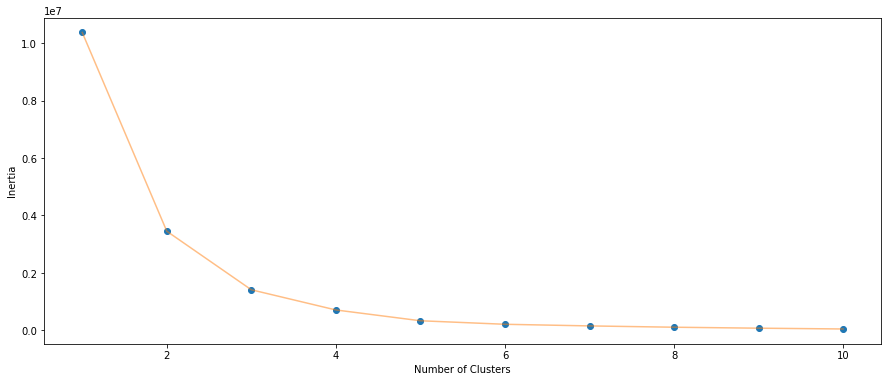

In [29]:
#Select N-cluster based inertia Malaysia
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [30]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

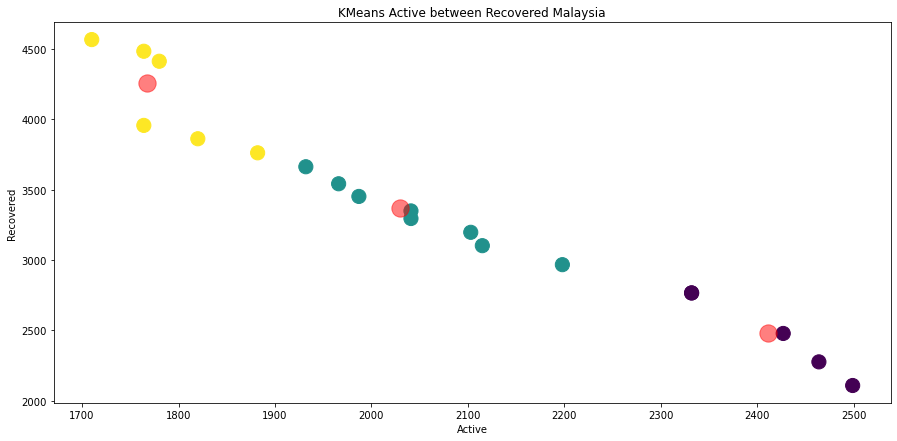

In [31]:
#Ploting KMeans Active between Recovered Malaysia
plt.figure( figsize = (15 , 7) )
plt.scatter( x = 'Active' ,y = 'Recovered' , data = malay , c = labels3 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Recovered') , plt.xlabel('Active')
plt.title('KMeans Active between Recovered Malaysia')
plt.show()